In [1]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import util
from pathlib import Path
from class_manipulates_path import ManipulatePath
from class_preprocessing import Preprocessing
from class_format_data import FormatData
util.init()

'Módulo util importado com sucesso.'

In [2]:
def plot_variable(df, column_name, intervalos=None):
    """
    Plota um gráfico de dispersão para uma variável de um DataFrame.

    Parâmetros:
        - df: DataFrame pandas contendo os dados.
        - column_name: Nome da coluna que você deseja plotar.
        - intervalos: Lista de intervalos para plotar linhas verticais.
    """
    plt.figure(figsize=(20, 10))
    plt.scatter(df.index.values, df[column_name].values, color='darkcyan', alpha=0.5)
    plt.xlabel('Índice')
    plt.ylabel(column_name)
    plt.title(f'Gráfico de dispersão para a variável "{column_name}"')


    # Plotar linhas verticais para cada intervalo
    if intervalos:
        for intervalo in intervalos:
            plt.axvline(x=intervalo, linestyle='--', color='red')

    plt.show()

In [3]:
def class_and_file_generator(data_path, real=False, simulated=False, drawn=False):
    for class_path in data_path.iterdir():
        if class_path.is_dir():
            class_code = int(class_path.stem)
            for instance_path in class_path.iterdir():
                if (instance_path.suffix == '.csv'):
                    if (simulated and instance_path.stem.startswith('SIMULATED')) or \
                       (drawn and instance_path.stem.startswith('DRAWN')) or \
                       (real and (not instance_path.stem.startswith('SIMULATED')) and \
                       (not instance_path.stem.startswith('DRAWN'))):
                        yield class_code, instance_path

In [4]:
manipulate_path = ManipulatePath()

preprocessing = Preprocessing()

format_data = FormatData()

path_raw_data = manipulate_path.get_path_raw_data()

abnormal_classes_codes = [1, 2, 5, 6, 7, 8]

In [5]:
path_raw_data:Path = manipulate_path.get_path_raw_data()
file_name = "WELL-00001_20140124093303.csv"

file_path = str(path_raw_data.joinpath("1").joinpath(file_name))

In [6]:
df_data = pd.read_csv(file_path)

df_data = FormatData.set_index_dataframe(df_data=df_data,
                                         column_name="timestamp")
df_data

,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
timestamp,,,,,,,,,
2014-01-24 09:33:03,0.0,18433410.0,116.8718,9397031.0,74.80031,-300917.8,NaN,0.0,0.0
2014-01-24 09:33:04,0.0,18433410.0,116.8718,9397031.0,74.80031,-300917.8,NaN,0.0,0.0
2014-01-24 09:33:05,0.0,18433410.0,116.8718,9397032.0,74.80031,-300917.8,NaN,0.0,0.0
2014-01-24 09:33:06,0.0,18433410.0,116.8718,9397033.0,74.80031,-300917.8,NaN,0.0,0.0
2014-01-24 09:33:07,0.0,18433410.0,116.8718,9397033.0,74.80031,-300917.8,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2014-01-25 01:47:26,0.0,17424650.0,117.5764,7951086.0,79.25578,-300917.8,NaN,0.0,1.0
2014-01-25 01:47:27,0.0,17424600.0,117.5763,7951086.0,79.25582,-300917.8,NaN,0.0,1.0
2014-01-25 01:47:28,0.0,17424560.0,117.5762,7951086.0,79.25587,-300917.8,NaN,0.0,1.0


In [7]:
# from ydata_profiling import ProfileReport
# 
# report = ProfileReport(df_data, title='Relatório de Análise Exploratória de Dados')
# 
# report.to_file(os.path.join(path_raw_data, "my_report.html"))

In [8]:
df_data = Preprocessing.remove_duplicates_index(df_data=df_data)

class_preprocessing - INFO - ============ Remove duplicates DataFrame ============
class_preprocessing - INFO - No duplicate index was found.


In [9]:
Preprocessing.check_null_dataframe(df_data=df_data)

class_preprocessing - INFO - ============ Check null DataFrame ============
class_preprocessing - INFO - No data null was found for P-PDG.
class_preprocessing - INFO - No data null was found for P-TPT.
class_preprocessing - INFO - No data null was found for T-TPT.
class_preprocessing - INFO - No data null was found for P-MON-CKP.
class_preprocessing - INFO - No data null was found for T-JUS-CKP.
class_preprocessing - INFO - No data null was found for P-JUS-CKGL.
class_preprocessing - INFO - 100.00% are null for T-JUS-CKGL.
class_preprocessing - INFO - No data null was found for QGL.
class_preprocessing - INFO - 0.25% are null for class.


In [10]:
Preprocessing.check_negative_number(df_data=df_data)

class_preprocessing - INFO - ============ Check negative number ============
class_preprocessing - INFO - No negative number was found for P-PDG.
class_preprocessing - INFO - No negative number was found for P-TPT.
class_preprocessing - INFO - No negative number was found for T-TPT.
class_preprocessing - INFO - No negative number was found for P-MON-CKP.
class_preprocessing - INFO - No negative number was found for T-JUS-CKP.
class_preprocessing - INFO - Amount of negative numbers for the P-JUS-CKGL are 58468
class_preprocessing - INFO - No negative number was found for T-JUS-CKGL.
class_preprocessing - INFO - No negative number was found for QGL.
class_preprocessing - INFO - No negative number was found for class.


In [11]:
df_data = Preprocessing.remove_low_variance(df_data=df_data)

class_preprocessing - INFO - Sensor is flat: P-PDG
class_preprocessing - INFO - Sensor is flat: P-JUS-CKGL
class_preprocessing - INFO - Sensor is flat: QGL
class_preprocessing - INFO - Feature with low variance are ['P-PDG', 'P-JUS-CKGL', 'QGL']
class_preprocessing - INFO - Amouts features removed are 3


In [12]:
df_data

,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,T-JUS-CKGL,class
timestamp,,,,,,
2014-01-24 09:33:03,18433410.0,116.8718,9397031.0,74.80031,NaN,0.0
2014-01-24 09:33:04,18433410.0,116.8718,9397031.0,74.80031,NaN,0.0
2014-01-24 09:33:05,18433410.0,116.8718,9397032.0,74.80031,NaN,0.0
2014-01-24 09:33:06,18433410.0,116.8718,9397033.0,74.80031,NaN,0.0
2014-01-24 09:33:07,18433410.0,116.8718,9397033.0,74.80031,NaN,0.0
...,...,...,...,...,...,...
2014-01-25 01:47:26,17424650.0,117.5764,7951086.0,79.25578,NaN,1.0
2014-01-25 01:47:27,17424600.0,117.5763,7951086.0,79.25582,NaN,1.0
2014-01-25 01:47:28,17424560.0,117.5762,7951086.0,79.25587,NaN,1.0


In [13]:
df_data = Preprocessing.remove_null_data(df_data=df_data)

class_preprocessing - INFO - ============ Remove null DataFrame ============
class_preprocessing - INFO - T-JUS-CKGL with 100.00% of null data. It was removed.


In [14]:
# for column in df_data.columns:     
#     outlier = Preprocessing.iqr_score_outlier_detection(data=df_data[column],
#                                               window_size=30,
#                                               threshold=0.8)
#     df_data = df_data.drop(df_data.index[outlier])
#     print(f"Amount of local outliers for the {column}: {len(outlier)}")

In [15]:
df_data

,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,class
timestamp,,,,,
2014-01-24 09:33:03,18433410.0,116.8718,9397031.0,74.80031,0.0
2014-01-24 09:33:04,18433410.0,116.8718,9397031.0,74.80031,0.0
2014-01-24 09:33:05,18433410.0,116.8718,9397032.0,74.80031,0.0
2014-01-24 09:33:06,18433410.0,116.8718,9397033.0,74.80031,0.0
2014-01-24 09:33:07,18433410.0,116.8718,9397033.0,74.80031,0.0
...,...,...,...,...,...
2014-01-25 01:47:26,17424650.0,117.5764,7951086.0,79.25578,1.0
2014-01-25 01:47:27,17424600.0,117.5763,7951086.0,79.25582,1.0
2014-01-25 01:47:28,17424560.0,117.5762,7951086.0,79.25587,1.0


In [56]:
sns.color_palette("pastel", 20)

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353),
 (0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [43]:
def plot_variable_fundo(df, column):
    fig, ax = plt.subplots(figsize=(20, 10))

    # Definir os nomes das classes e associar cores a cada uma
    classes = df['class'].unique()
    class_names = {0: 'Normal', 101: 'Transiente', 1: 'Falha'}  # Ajuste conforme as classes no seu dataframe

    num_classes = len(classes)
    color_order = ['blue', 'green', 'yellow', 'red']
    palette = sns.color_palette("pastel", num_classes + 1)
    colors = dict(zip(classes, palette[1:]))

    timestamps = df.index.unique()
    
    start = timestamps[0]
    
    # Iterar sobre os timestamps e marcar o início e o fim do fundo de cada classe
    for i, timestamp in enumerate(timestamps[:-1]):
        if df.loc[timestamp, 'class'] != df.loc[timestamps[i + 1], 'class']:
            cls = df.loc[timestamp, 'class']
            end = timestamps[i]
            ax.axvspan(start, end, color=colors[cls], alpha=0.5)
            start = timestamps[i + 1]
    
    cls = df.loc[timestamps[-1], 'class']
    ax.axvspan(start, timestamps[-1], color=colors[cls], alpha=0.5)

    # Plotar a variável
    df[column].plot(ax=ax)

    # Criar uma legenda manualmente
    handles = [plt.Line2D([0, 1], [0, 1], color=colors[cls], linewidth=5, alpha=0.5) for cls in classes]
    labels = [class_names[cls] for cls in classes]
    ax.legend(handles, labels, title='Classes')

    plt.show()

In [69]:
def plot_variable_fundo(df, column):
    fig, ax = plt.subplots(figsize=(16, 8))

    # Definir os nomes das classes e associar cores a cada uma
    class_names = {0: 'Normal', 101: 'Transiente', 1: 'Falha'}  # Ajuste conforme as classes no seu dataframe

    # Obter a paleta de cores pastel com pelo menos 4 cores
    palette = sns.color_palette("pastel", 9)
    
    # Associar cores específicas a cada classe
    colors = {0: palette[2], 101: palette[1], 1: palette[3]}

    timestamps = df.index.unique()
    
    start = timestamps[0]
    
    # Iterar sobre os timestamps e marcar o início e o fim do fundo de cada classe
    for i, timestamp in enumerate(timestamps[:-1]):
        if df.loc[timestamp, 'class'] != df.loc[timestamps[i + 1], 'class']:
            cls = df.loc[timestamp, 'class']
            end = timestamps[i]
            ax.axvspan(start, end, color=colors[cls], alpha=0.5)
            start = timestamps[i + 1]
    
    cls = df.loc[timestamps[-1], 'class']
    ax.axvspan(start, timestamps[-1], color=colors[cls], alpha=0.5)

    ax.plot(df.index, df[column], label=column, color='royalblue')
    
    # Definir nomes dos eixos
    ax.set_xlabel('Tempo (s)')
    ax.set_ylabel(f"{column} (°C)")

    # Definir os limites do eixo x
    ax.set_xlim(df.index.min(), df.index.max())

    # Criar uma legenda manualmente
    handles = [plt.Line2D([0, 1], [0, 1], color=colors[cls], linewidth=5, alpha=0.5) for cls in class_names.keys()]
    labels = [class_names[cls] for cls in class_names.keys()]
    ax.legend(handles, labels, title='Períodos')
    
    # Salvar o gráfico como um arquivo SVG
    plt.savefig("normal_transiente_falha.svg", format='svg')
    plt.show()

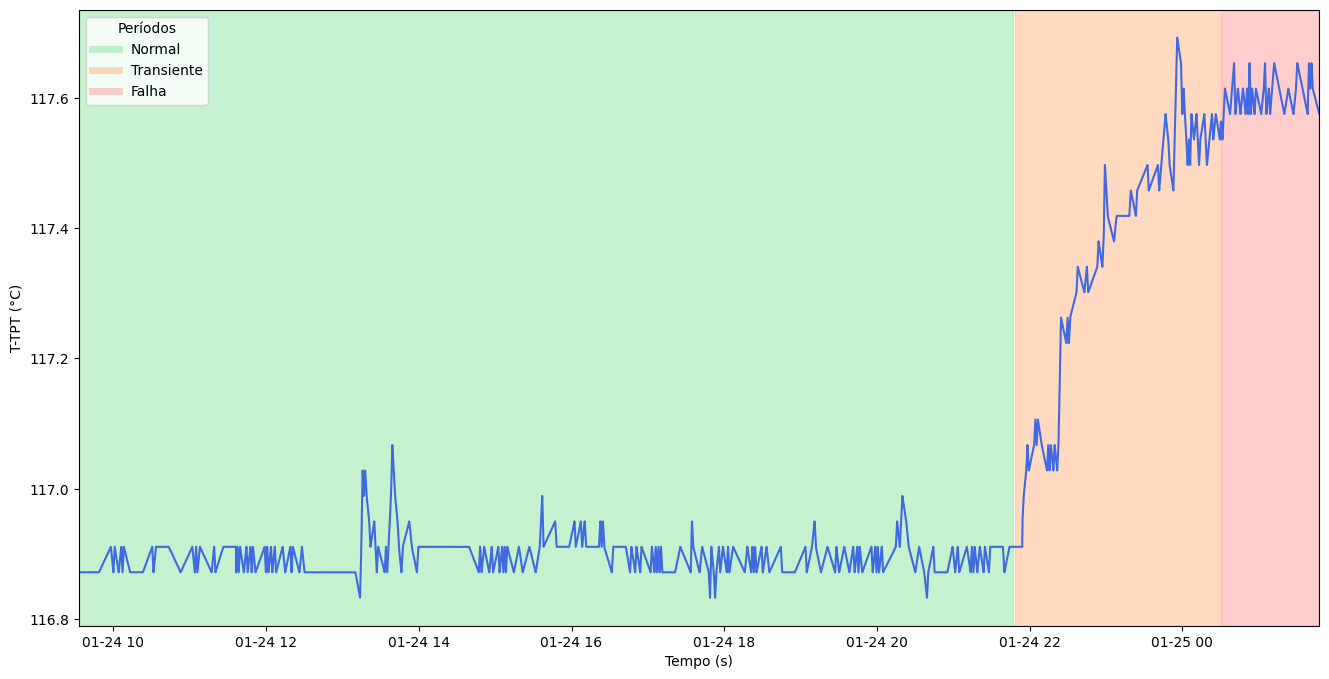

In [70]:
df_aux = df_data.copy().dropna()
plot_variable_fundo(df_aux.copy(), "T-TPT")

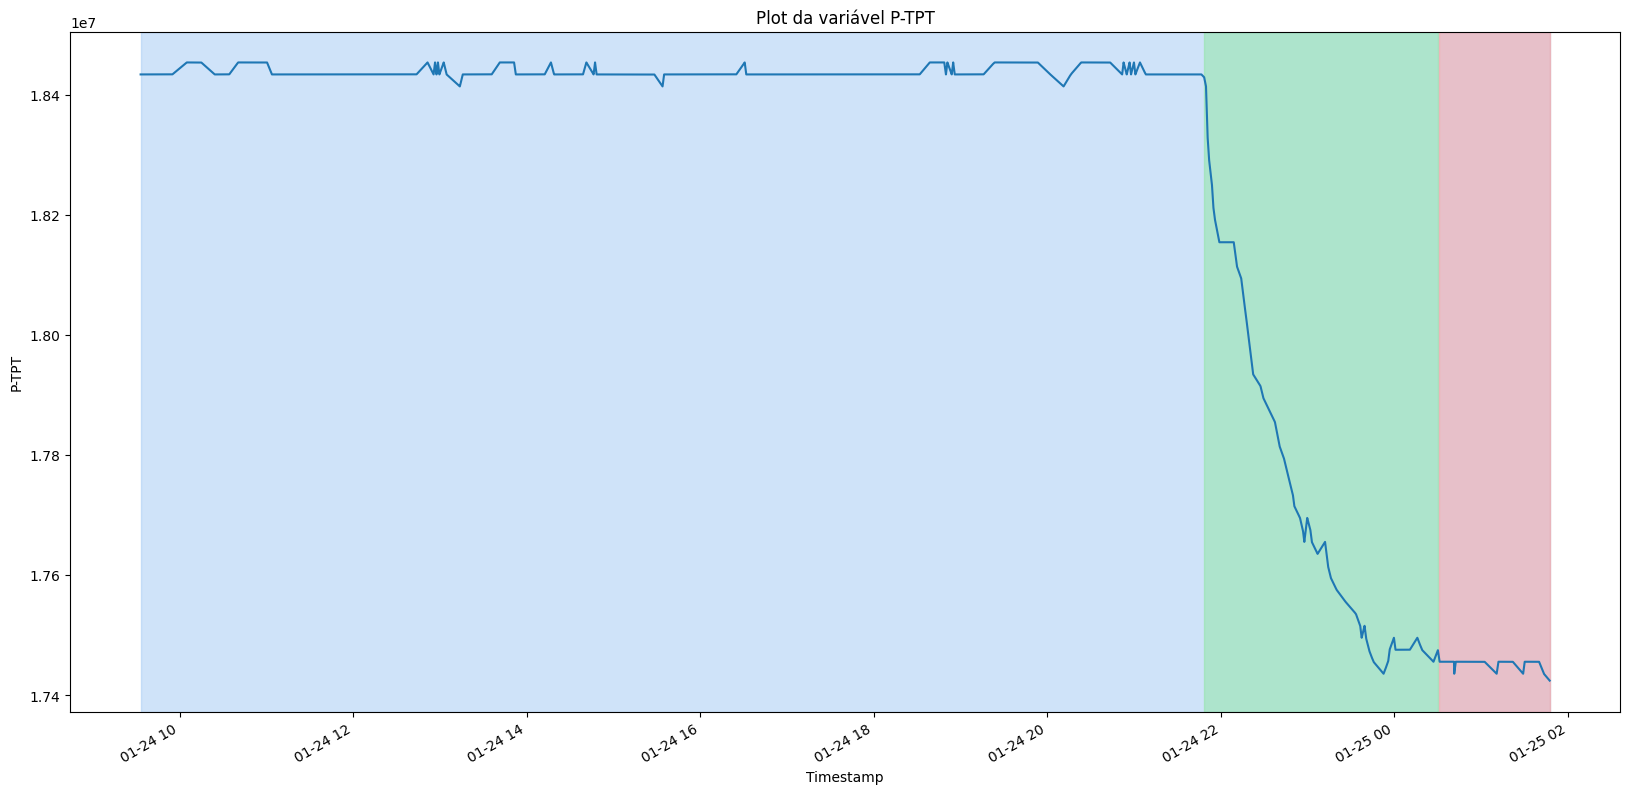

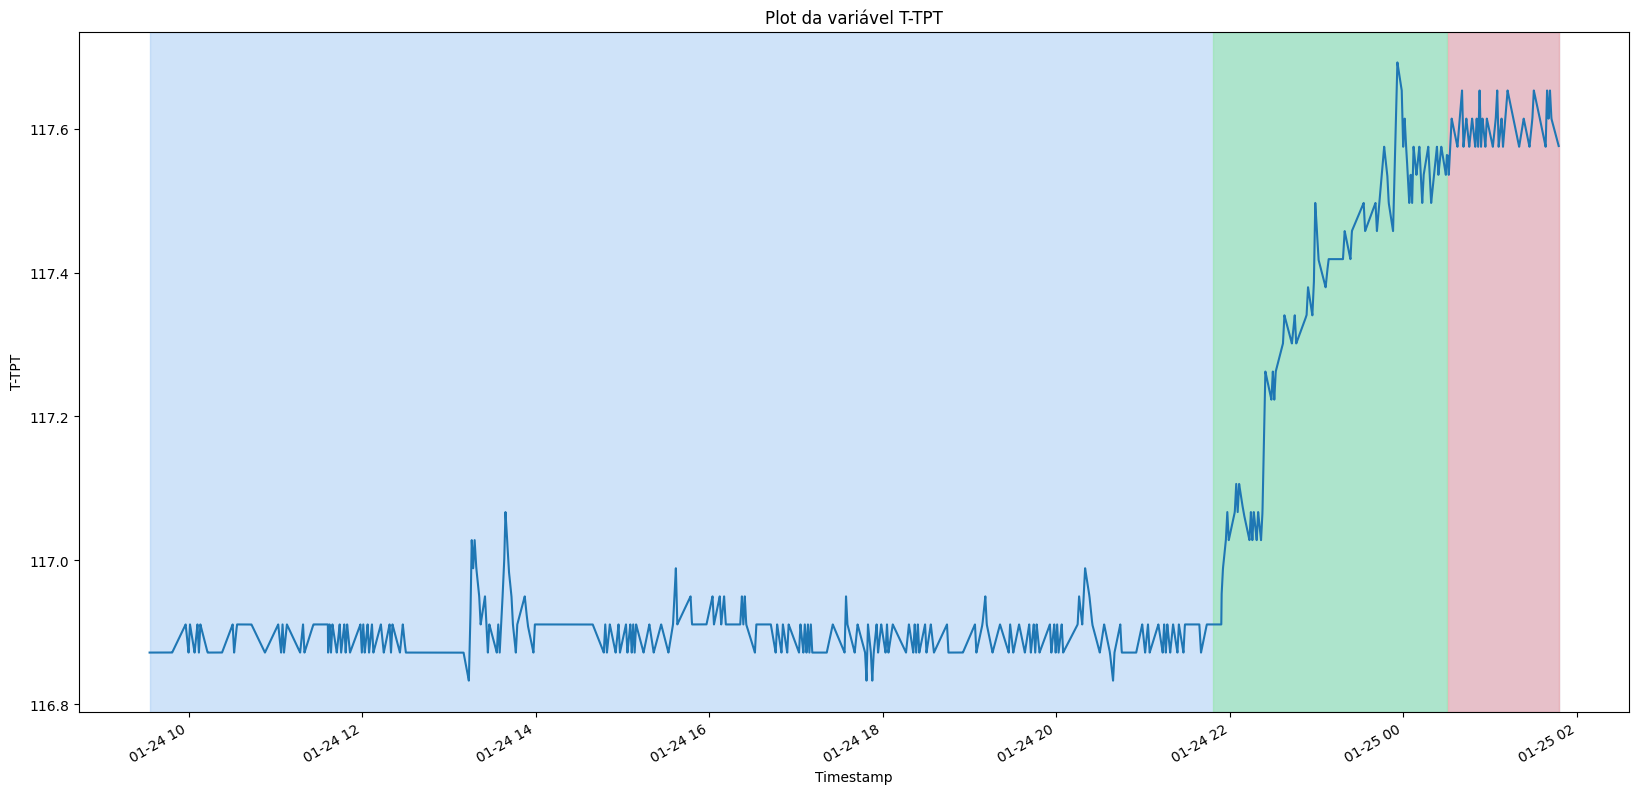

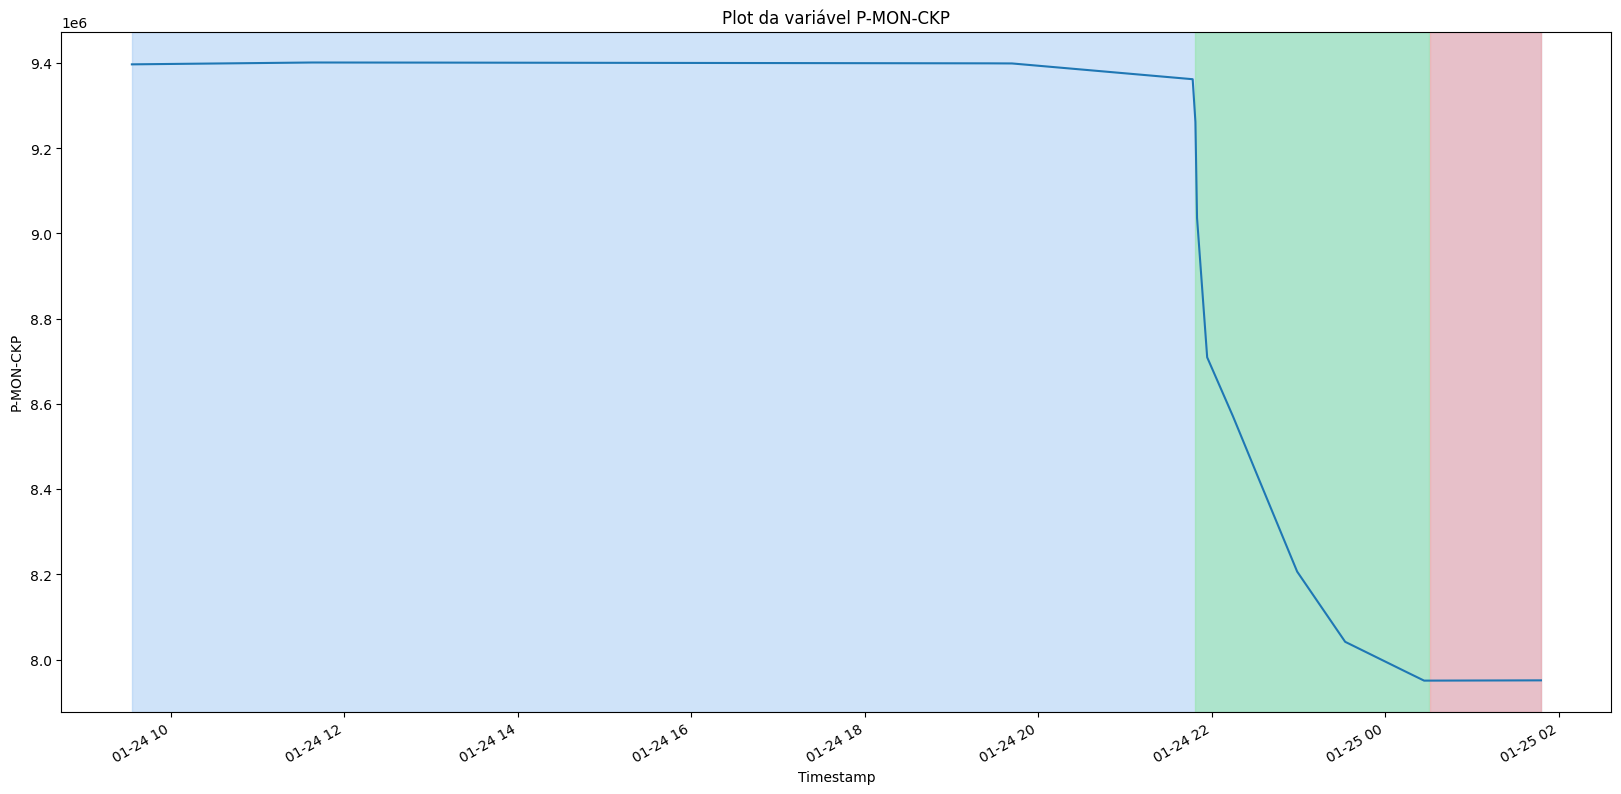

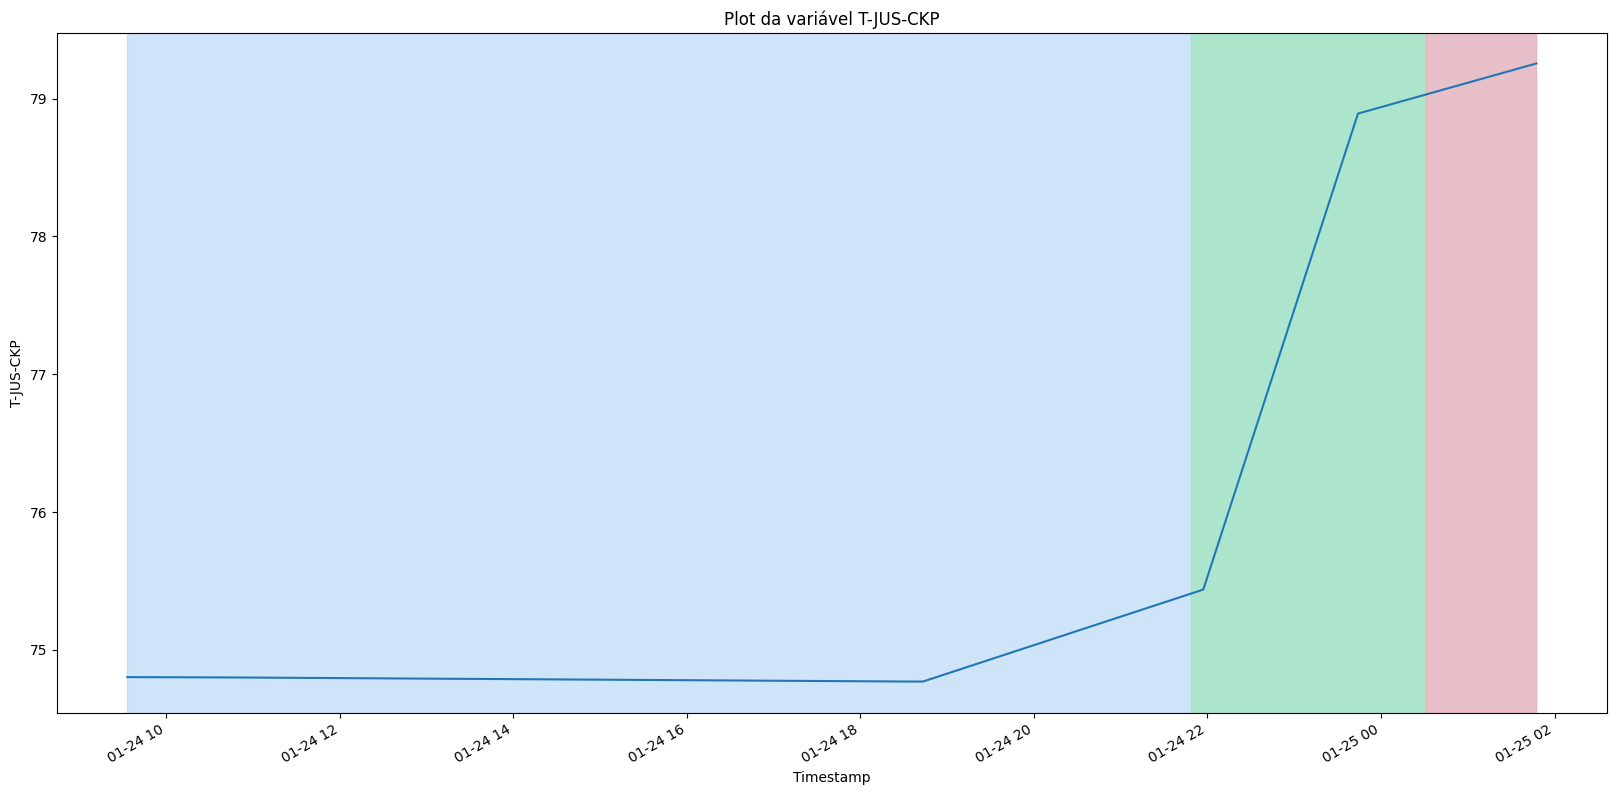

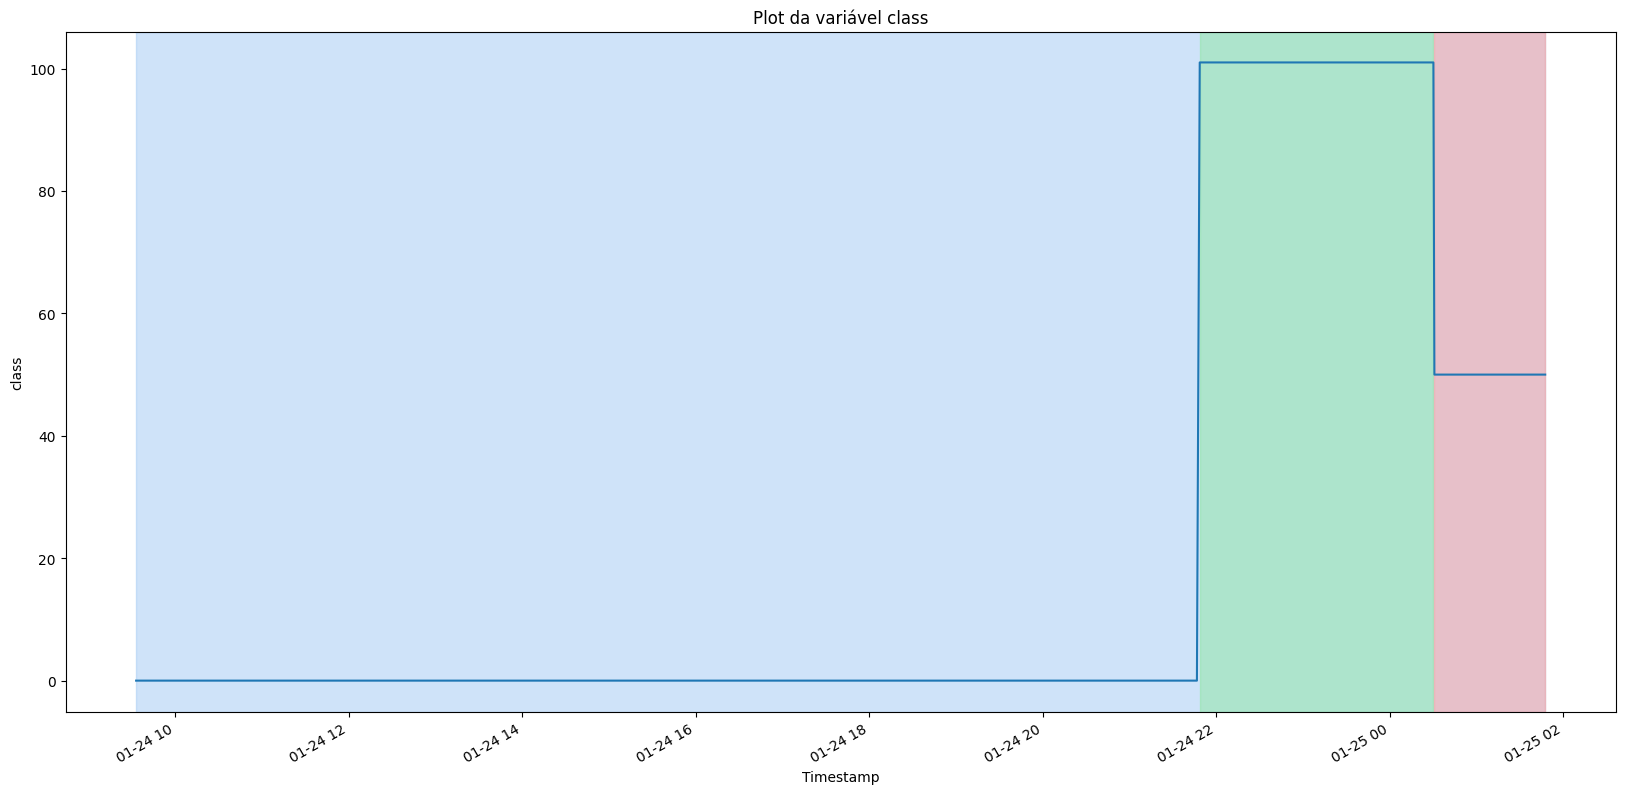

In [55]:
import numpy as np
def plot_variable_fundo(df, column):

    fig, ax = plt.subplots(figsize=(20, 10))

    classes = df['class'].unique()
    num_classes = len(classes)
    
    color_order = ['blue', 'green', 'yellow', 'red']
    
    palette = sns.color_palette("pastel", num_classes + 1)
    
    colors = dict(zip(classes, palette[1:]))
    
    timestamps = df.index.unique()
    
    ax.axvspan(timestamps[0], timestamps[-1], color=palette[0], alpha=0.5)
    
    start = None
    
    # Iterar sobre os timestamps e marcar o início e o fim do fundo de cada classe
    for i, timestamp in enumerate(timestamps[:-1]):
        if df.loc[timestamp, 'class'] != df.loc[timestamps[i + 1], 'class']:
            
            cls = df.loc[timestamp, 'class']
            if start is not None:
                end = timestamps[i]
                ax.axvspan(start, end, color=colors[cls], alpha=0.5)

            start = timestamps[i + 1]

    cls = df.loc[timestamps[-1], 'class']
    if start is not None:
        ax.axvspan(start, timestamps[-1], color=colors[cls], alpha=0.5)

    df[column].plot(ax=ax)
    

    plt.xlabel('Timestamp')
    plt.ylabel(column)
    plt.title(f'Plot da variável {column}')
    plt.show()

df_aux = df_data.copy().dropna()
df_aux["class"] = df_aux["class"].replace(1, 50)

# Iterar sobre as colunas do DataFrame e plotar cada variável
for column in df_aux.columns:
    if df_data[column].dtype.kind in ['i', 'u', 'f', 'c']:
        interval = plot_variable_fundo(df_aux.copy(), column)

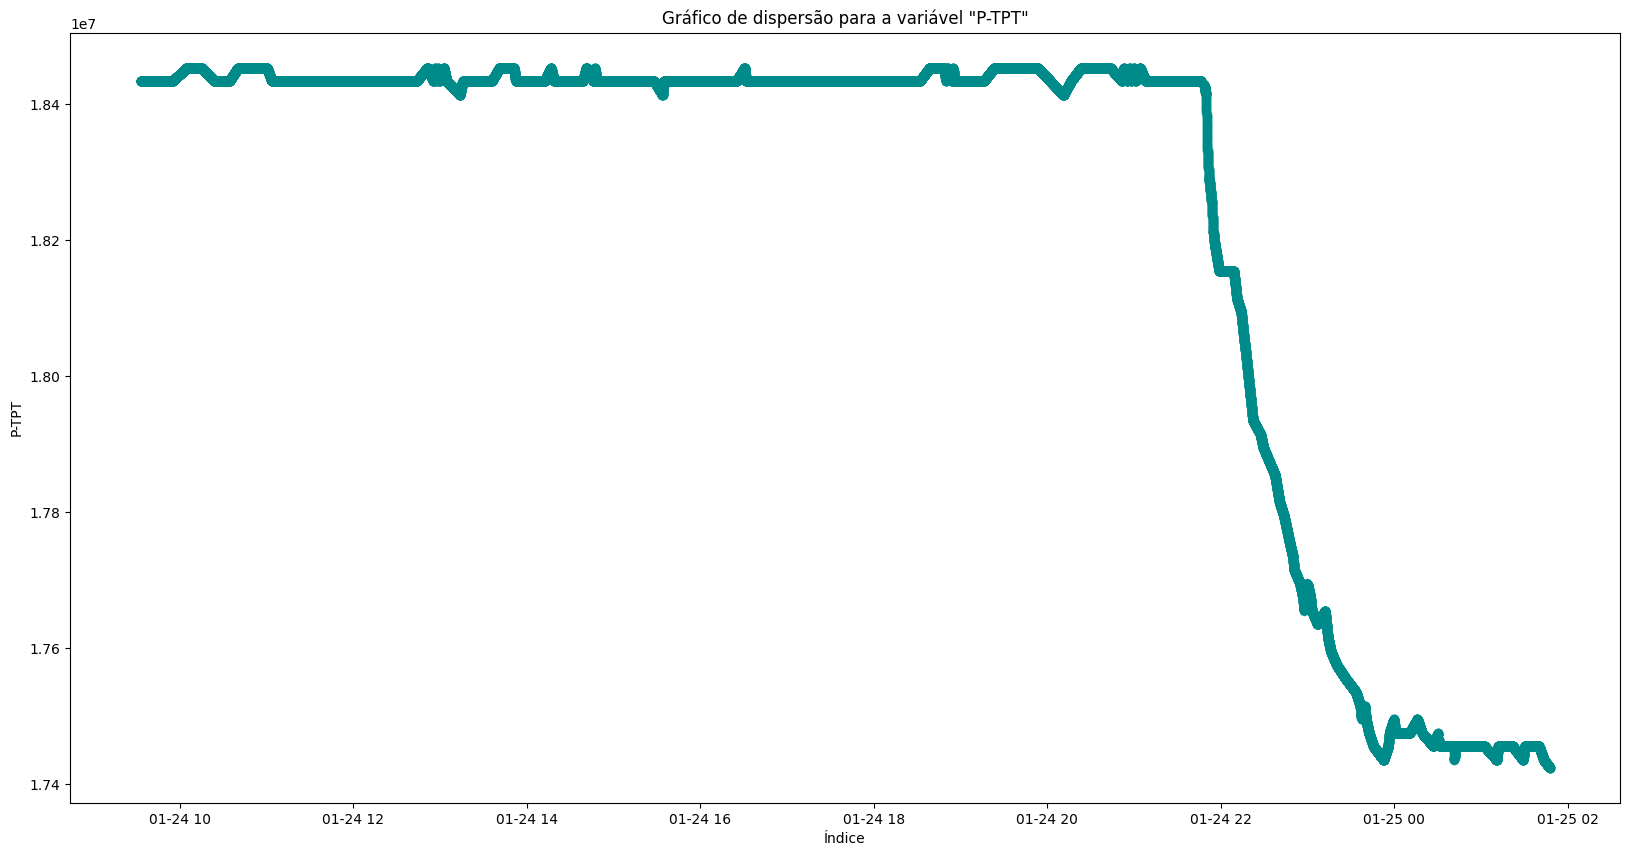

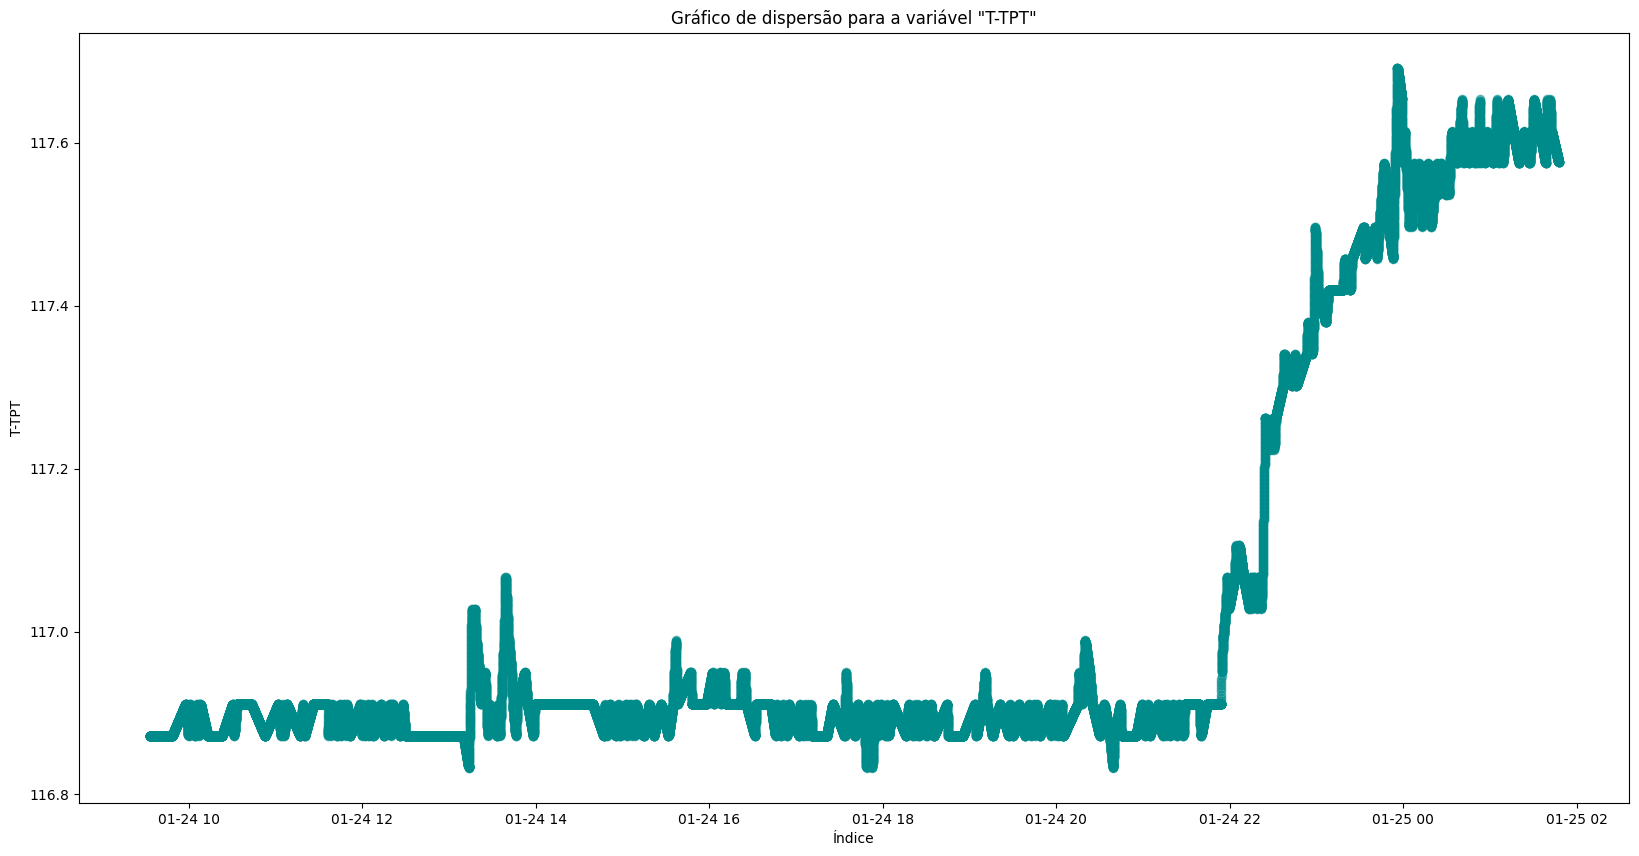

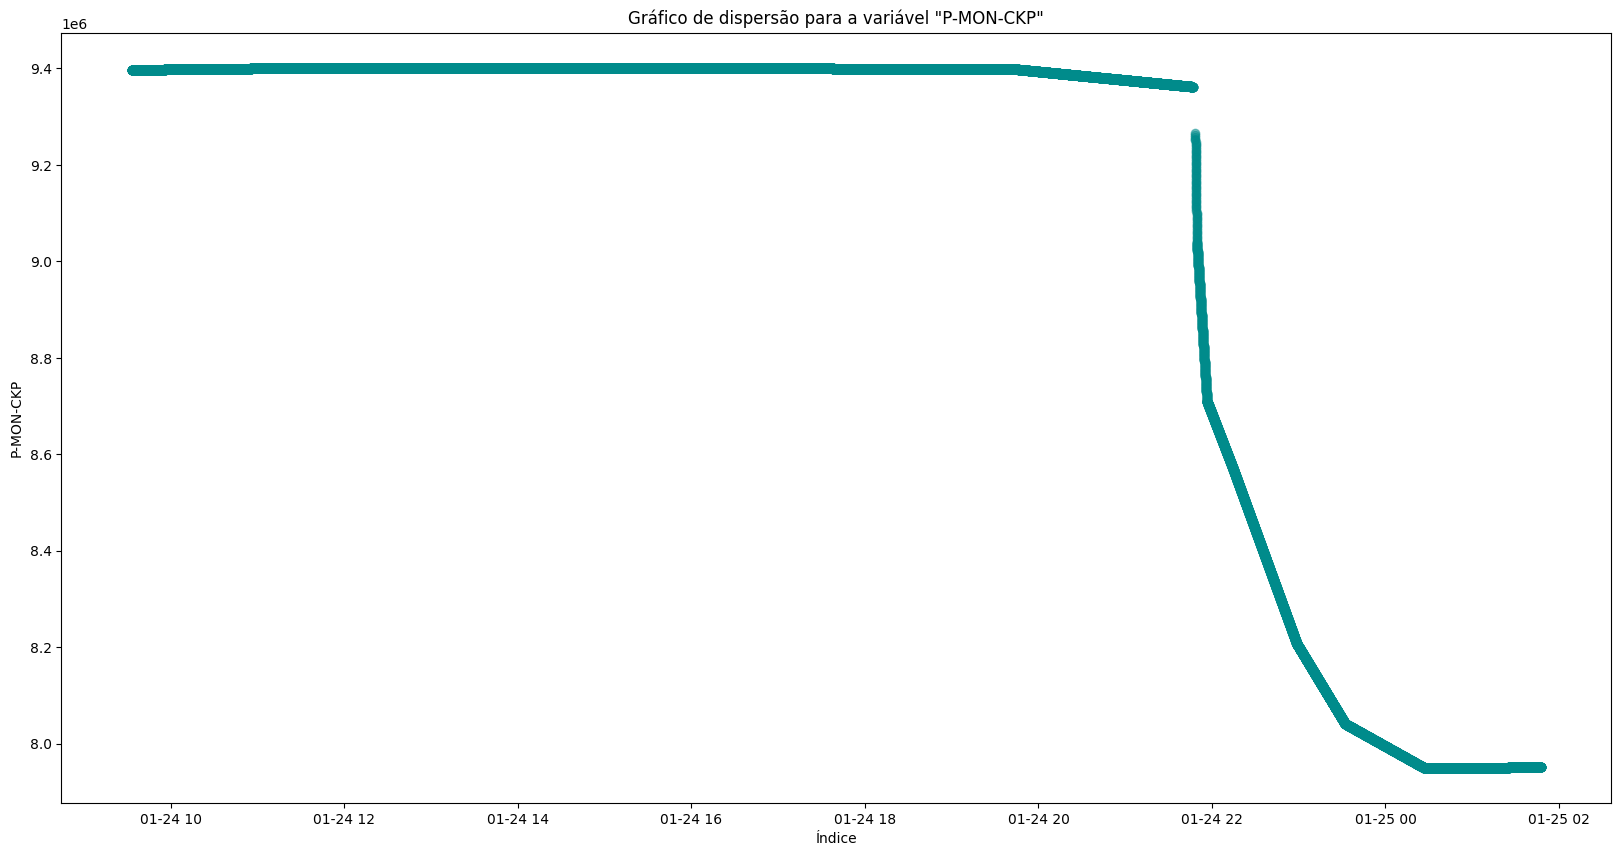

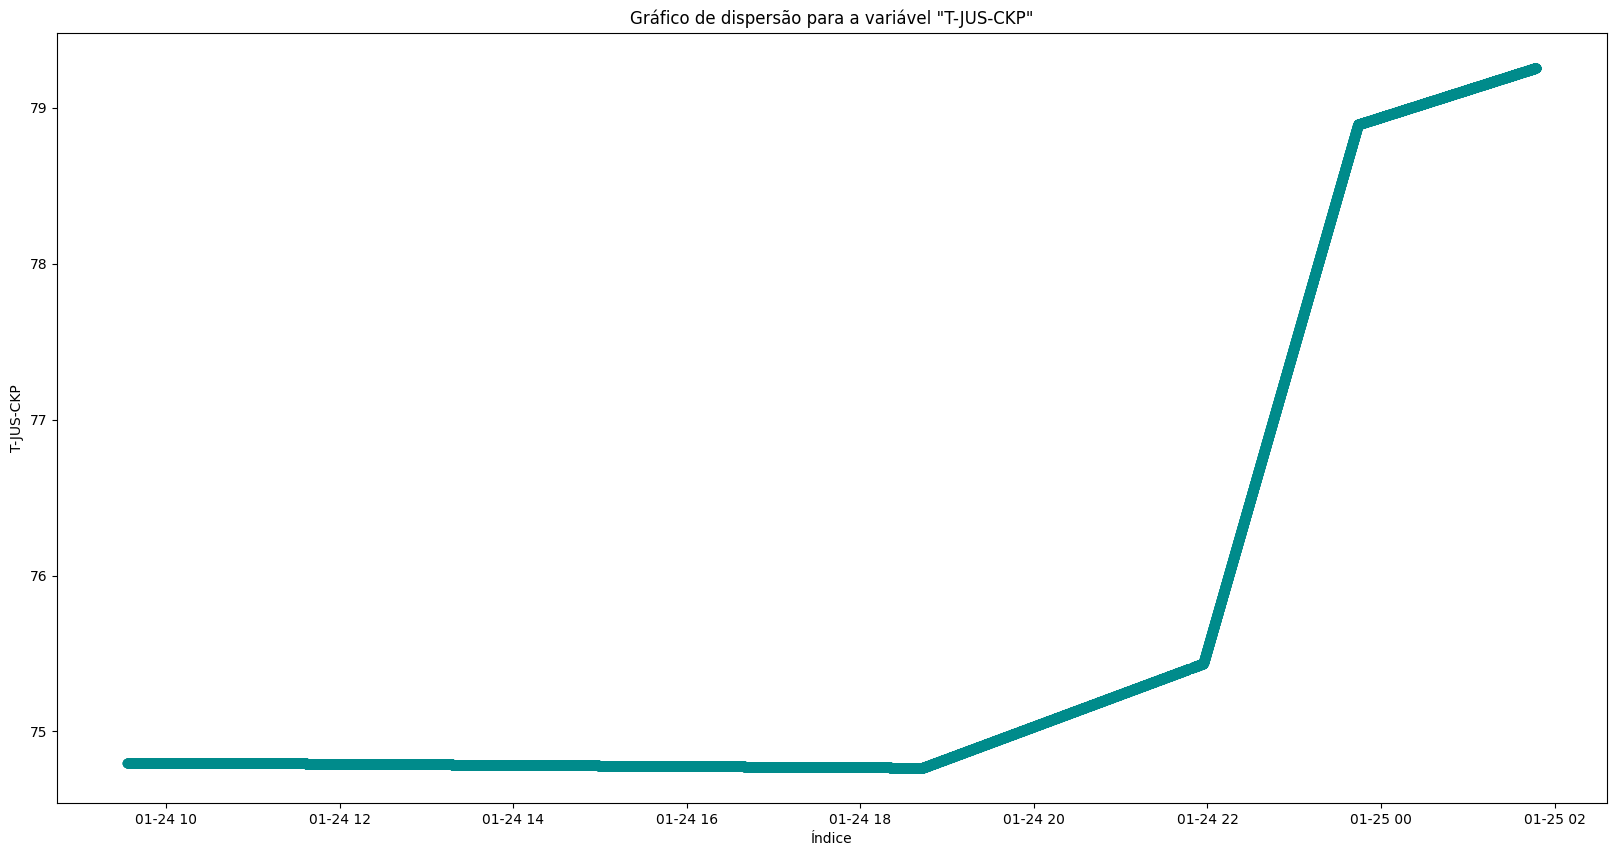

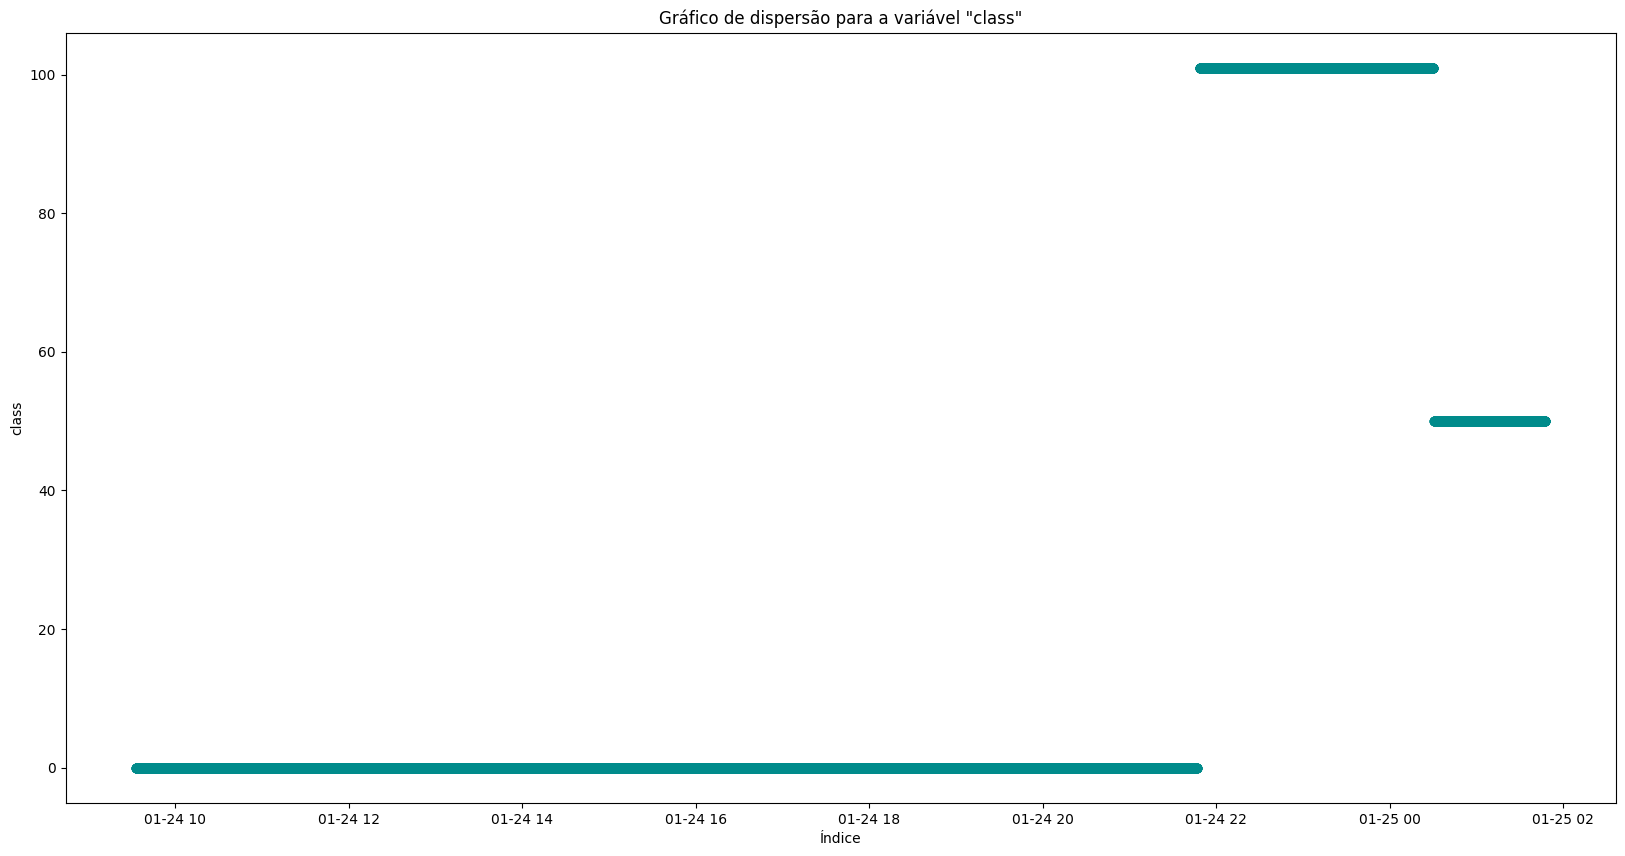

In [58]:
for column in df_aux.columns:
    if df_aux[column].dtype.kind in ['i', 'u', 'f', 'c']:
        plot_variable(df_aux, column)

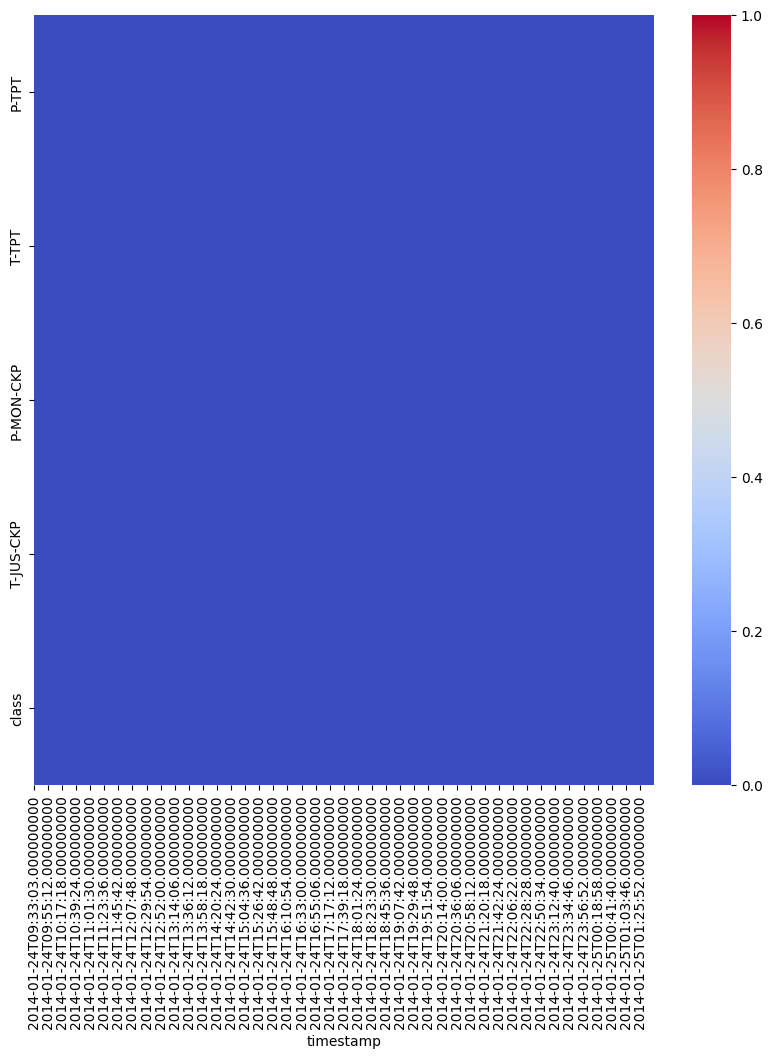

In [56]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_aux.isna().T, vmin=0, vmax=1, cmap='coolwarm')
plt.show()